In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from datetime import datetime,date
import time
import matplotlib.patches as mpatches
import scipy.stats as st

In [2]:
covid_data = pd.read_csv("../Output/industry/M_C19_AU_2018_2021.csv")
unemployment_data = pd.read_csv("Ray Data/employment_study_1.csv")

In [3]:
#unemployment is a lagging indicator, time to chop the top value to allign covid case data with unemployment the month after
unemployment_data = unemployment_data.iloc[1:]
unemployment_data.head()

,Unnamed: 0,Date,Unemployment_Rate_NSW,Unemployment_Rate_VIC,Unemployment_Rate_QLD,Unemployment_Rate_SA,Unemployment_Rate_WA,Unemployment_Rate_TAS,Unemployment_Rate_NT,Unemployment_Rate_ACT,Month,Year
1,1,2018-02-01,4.822227,5.582018,6.342373,6.229473,6.136357,5.955918,4.062224,3.895920,2,2018
2,2,2018-03-01,4.974445,5.242348,6.039556,5.570476,6.878773,5.987308,3.810160,3.792877,3,2018
3,3,2018-04-01,4.926401,5.201760,6.491841,5.788742,6.424739,5.902720,4.497818,3.627720,4,2018
4,4,2018-05-01,4.864832,5.076189,6.208778,5.729293,6.284294,6.596782,3.928256,3.446903,5,2018
5,5,2018-06-01,4.668844,5.548635,5.805580,5.532035,6.191218,5.757447,4.423351,3.778179,6,2018


In [4]:
covid_data.tail()

,Unnamed: 0,ACT,NSW,NT,QLD,SA,TAS,VIC,WA,AU,Month
35,35,1,346,22,51,18,4,31,40,513,12_2020
36,36,0,182,23,57,16,0,73,42,393,01_2021
37,37,0,70,7,21,20,0,32,10,160,02_2021
38,38,5,116,3,146,40,0,3,31,344,03_2021
39,39,0,106,28,43,37,0,20,38,272,04_2021


In [5]:
#clean to have same number of data points as unemployment (37)
covid_data.drop(covid_data.tail(2).index,inplace=True)
covid_data.tail()

,Unnamed: 0,ACT,NSW,NT,QLD,SA,TAS,VIC,WA,AU,Month
33,33,1,198,5,15,33,0,163,84,499,10_2020
34,34,3,157,15,30,61,0,-1,52,317,11_2020
35,35,1,346,22,51,18,4,31,40,513,12_2020
36,36,0,182,23,57,16,0,73,42,393,01_2021
37,37,0,70,7,21,20,0,32,10,160,02_2021


In [6]:
#timepoints = covid_data["Month"]
#timepoints.tail()

## LineGraph Visualisation

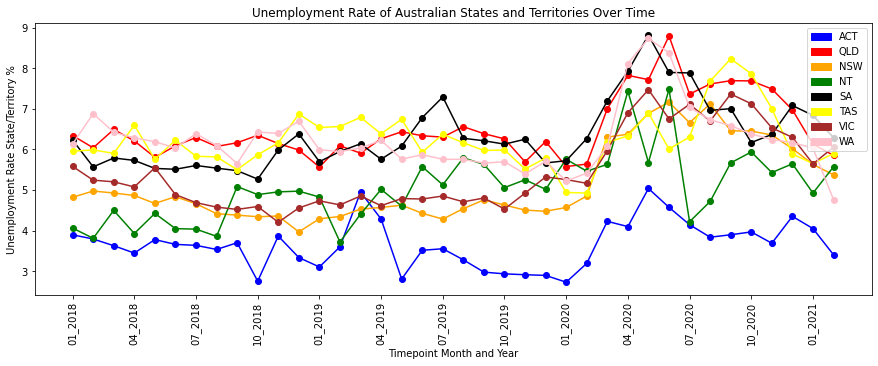

In [17]:
#y variables
unemployment_act = unemployment_data["Unemployment_Rate_ACT"]
unemployment_qld = unemployment_data["Unemployment_Rate_QLD"]
unemployment_nsw = unemployment_data["Unemployment_Rate_NSW"]
unemployment_nt = unemployment_data["Unemployment_Rate_NT"]
unemployment_sa = unemployment_data["Unemployment_Rate_SA"]
unemployment_tas = unemployment_data["Unemployment_Rate_TAS"]
unemployment_vic = unemployment_data["Unemployment_Rate_VIC"]
unemployment_wa = unemployment_data["Unemployment_Rate_WA"]

#x variable
timepoints = covid_data["Month"]

#plots
plt.figure(figsize=(15, 5))
plt.plot(timepoints, unemployment_act, marker ='o', color='blue', label = "ACT")
plt.plot(timepoints, unemployment_qld, marker ='o', color='red', label = "QLD")
plt.plot(timepoints, unemployment_nsw, marker ='o', color='orange', label = "NSW")
plt.plot(timepoints, unemployment_nt, marker ='o', color='green', label = "NT")
plt.plot(timepoints, unemployment_sa, marker ='o', color='black', label = "SA")
plt.plot(timepoints, unemployment_tas, marker ='o', color='yellow', label = "TAS")
plt.plot(timepoints, unemployment_vic, marker ='o', color='brown', label = "VIC")
plt.plot(timepoints, unemployment_wa, marker ='o', color='pink', label = "WA")

# adding ticks to only every quarter
plt.xticks([0,3,6,9,12,15,18,21,24,27,30,33,36], rotation="vertical")

# labeling
plt.xlabel("Timepoint Month and Year")
plt.ylabel("Unemployment Rate State/Territory %")
plt.title('Unemployment Rate of Australian States and Territories Over Time')

#creating pretty legend
act_handle = mpatches.Patch(color='blue', label='ACT')
qld_handle = mpatches.Patch(color='red', label='QLD')
nsw_handle = mpatches.Patch(color='orange', label='NSW')
nt_handle = mpatches.Patch(color='green', label='NT')
sa_handle = mpatches.Patch(color='black', label='SA')
tas_handle = mpatches.Patch(color='yellow', label='TAS')
vic_handle = mpatches.Patch(color='brown', label='VIC')
wa_handle = mpatches.Patch(color='pink', label='WA')
plt.legend(handles= [act_handle, qld_handle, nsw_handle, nt_handle,
                     sa_handle, tas_handle, vic_handle, wa_handle   ])


#show output
plt.show()

In [8]:
#defining x variables
cases_act = covid_data["ACT"]
cases_qld = covid_data["QLD"]
cases_nsw = covid_data["NSW"]
cases_nt = covid_data["NT"]
cases_sa = covid_data["SA"]
cases_tas = covid_data["TAS"]
cases_vic = covid_data["VIC"]
cases_wa = covid_data["WA"]

## Scatterplot

0.22


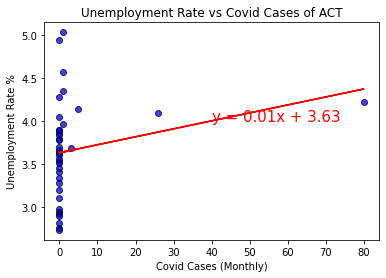

In [9]:
# Calculate the correlation coefficient 
correlation = st.pearsonr(cases_act, unemployment_act)
print(round(correlation[0],2))


#regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cases_act, unemployment_act)
regress_values = cases_act * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(40,4.0),fontsize=15,color="red")
plt.plot(cases_act,regress_values,"r-")

plt.scatter(cases_act, unemployment_act, marker="o", facecolors="b", edgecolors="black", alpha=0.75)
plt.xlabel("Covid Cases (Monthly)")
plt.ylabel("Unemployment Rate %")
plt.title("Unemployment Rate vs Covid Cases of ACT")
plt.show()

0.26


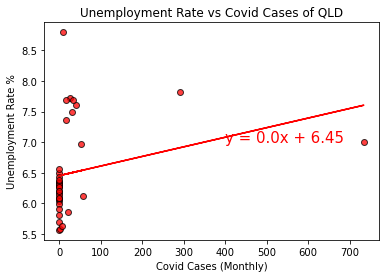

In [10]:
# Calculate the correlation coefficient 
correlation = st.pearsonr(cases_qld, unemployment_qld)
print(round(correlation[0],2))

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cases_qld, unemployment_qld)
regress_values = cases_qld * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(400,7.0),fontsize=15,color="red")
plt.plot(cases_qld,regress_values,"r-")

plt.scatter(cases_qld, unemployment_qld, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Covid Cases (Monthly)")
plt.ylabel("Unemployment Rate %")
plt.title("Unemployment Rate vs Covid Cases of QLD")
plt.show()

0.5


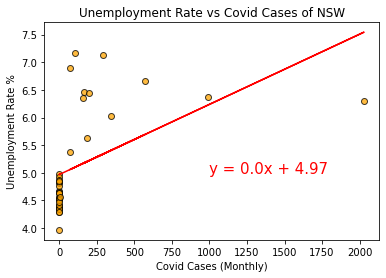

In [11]:
# Calculate the correlation coefficient 
correlation = st.pearsonr(cases_nsw, unemployment_nsw)
print(round(correlation[0],2))


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cases_nsw, unemployment_nsw)
regress_values = cases_nsw * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(1000,5.0),fontsize=15,color="red")
plt.plot(cases_nsw,regress_values,"r-")

plt.scatter(cases_nsw, unemployment_nsw, marker="o", facecolors="orange", edgecolors="black", alpha=0.75)
plt.xlabel("Covid Cases (Monthly)")
plt.ylabel("Unemployment Rate %")
plt.title("Unemployment Rate vs Covid Cases of NSW")
plt.show()

0.28


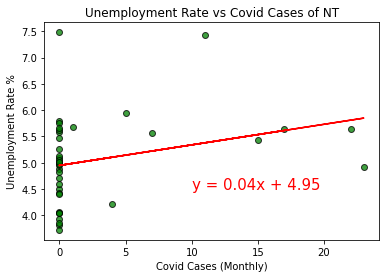

In [12]:
# Calculate the correlation coefficient 
correlation = st.pearsonr(cases_nt, unemployment_nt)
print(round(correlation[0],2))

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cases_nt, unemployment_nt)
regress_values = cases_nt * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,4.5),fontsize=15,color="red")
plt.plot(cases_nt,regress_values,"r-")

plt.scatter(cases_nt, unemployment_nt, marker="o", facecolors="green", edgecolors="black", alpha=0.75)
plt.xlabel("Covid Cases (Monthly)")
plt.ylabel("Unemployment Rate %")
plt.title("Unemployment Rate vs Covid Cases of NT")
plt.show()

0.29


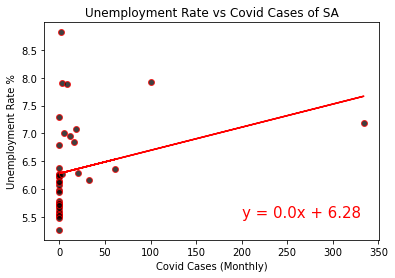

In [13]:
# Calculate the correlation coefficient 
correlation = st.pearsonr(cases_sa, unemployment_sa)
print(round(correlation[0],2))


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cases_sa, unemployment_sa)
regress_values = cases_sa * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(200,5.5),fontsize=15,color="red")
plt.plot(cases_sa,regress_values,"r-")

plt.scatter(cases_sa, unemployment_sa, marker="o", facecolors="black", edgecolors="red", alpha=0.75)
plt.xlabel("Covid Cases (Monthly)")
plt.ylabel("Unemployment Rate %")
plt.title("Unemployment Rate vs Covid Cases of SA")
plt.show()

0.02


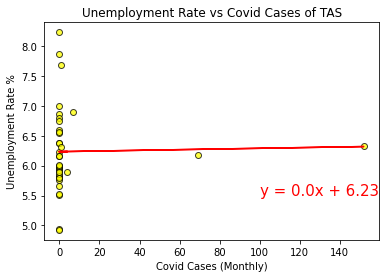

In [14]:
# Calculate the correlation coefficient 
correlation = st.pearsonr(cases_tas, unemployment_tas)
print(round(correlation[0],2))

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cases_tas, unemployment_tas)
regress_values = cases_tas * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(100,5.5),fontsize=15,color="red")
plt.plot(cases_tas,regress_values,"r-")

plt.scatter(cases_tas, unemployment_tas, marker="o", facecolors="yellow", edgecolors="black", alpha=0.75)
plt.xlabel("Covid Cases (Monthly)")
plt.ylabel("Unemployment Rate %")
plt.title("Unemployment Rate vs Covid Cases of TAS")
plt.show()

0.45


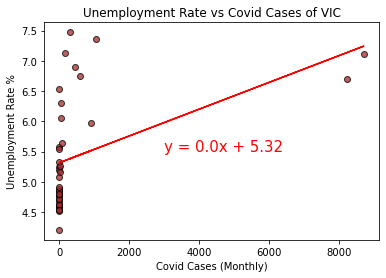

In [15]:
# Calculate the correlation coefficient 
correlation = st.pearsonr(cases_vic, unemployment_vic)
print(round(correlation[0],2))


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cases_vic, unemployment_vic)
regress_values = cases_vic * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(3000,5.5),fontsize=15,color="red")
plt.plot(cases_vic,regress_values,"r-")



plt.scatter(cases_vic, unemployment_vic, marker="o", facecolors="brown", edgecolors="black", alpha=0.75)
plt.xlabel("Covid Cases (Monthly)")
plt.ylabel("Unemployment Rate %")
plt.title("Unemployment Rate vs Covid Cases of VIC")
plt.show()

0.24


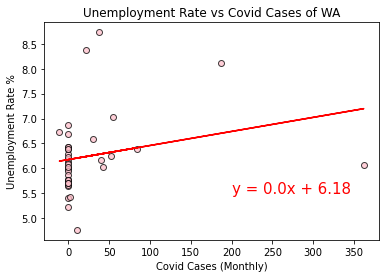

In [16]:
# Calculate the correlation coefficient 
correlation = st.pearsonr(cases_wa, unemployment_wa)
print(round(correlation[0],2))


#linear regressions model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cases_wa, unemployment_wa)
regress_values = cases_wa * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(200,5.5),fontsize=15,color="red")
plt.plot(cases_wa,regress_values,"r-")

#plot
plt.scatter(cases_wa, unemployment_wa, marker="o", facecolors="pink", edgecolors="black", alpha=0.75)
plt.xlabel("Covid Cases (Monthly)")
plt.ylabel("Unemployment Rate %")
plt.title("Unemployment Rate vs Covid Cases of WA")
plt.show()